In [66]:
import pandas as pd
import re
import spacy
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import PorterStemmer

In [5]:
chunksize = 1000
for chunk in pd.read_csv('archive/Resume/Resume.csv', chunksize=chunksize):
    df=chunk.head()
    break

In [9]:
df.loc[0]['Resume_str']

"         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss pr

In [15]:
from pypdf import PdfReader

reader = PdfReader("archive/data/data/ACCOUNTANT/10554236.pdf")
number_of_pages = len(reader.pages)
for each in range(number_of_pages):
    page = reader.pages[each]
    text = text+page.extract_text()

In [17]:
type(text)
# text

str

In [56]:
# clean_text = resume_cleaning(text)
clean_text = clean(text)
# print(clean_text)

In [63]:
clean_text[:100]

'accountant summary financial specialize financial planning report analysis department defense accoun'

In [69]:
def wordcloud(df):
    txt = df#' '.join(txt for txt in df)
    wordcloud = WordCloud(
        height=2000,
        width=4000
    ).generate(txt)

    return wordcloud

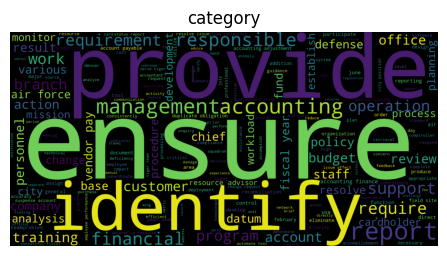

In [70]:
plt.figure(figsize=(32, 20))

# for i, category in enumerate(categories):
wc = wordcloud(clean_text)

plt.subplot(5, 5, 1).set_title('category')
plt.imshow(wc)
plt.axis('off')
plt.plot()

plt.show()
plt.close()

In [55]:
nlp = spacy.load('en_core_web_sm')

stopwords = ENGLISH_STOP_WORDS
# lemmatizer = WordNetLemmatizer()

def clean(doc):
    text_no_namedentities = []
    document = nlp(doc)
    ents = [e.text for e in document.ents]
    for item in document:
        if item.text in ents:
            pass
        else:
            text_no_namedentities.append(item.text)
    doc = (" ".join(text_no_namedentities))

    doc = doc.lower().strip()
    doc = doc.replace("</br>", " ")
    doc = doc.replace("-", " ")
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    # doc = "".join([lemmatizer.lemmatize(word) for word in doc])
    doc=nlp(doc)
    doc = " ".join([word.lemma_ for word in doc])
    
    return doc

In [37]:
def resume_cleaning(text):
    
    # Remove HTML tags 
    cleaned_text = re.sub(r'<.*?>', ' ', text)
    
    # Remove non-english characters, punctuation,special characters, digits, continous underscores and extra whitespace
    cleaned_text = re.sub('[^a-zA-Z]', ' ', cleaned_text)
    cleaned_text = re.sub(r'[^\w\s]|_', ' ', cleaned_text)
    cleaned_text = re.sub(r'\d+', ' ', cleaned_text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    cleaned_text=re.sub('http\S+\s', " ", cleaned_text)
    
    
    
    # Convert to lowercase
    cleaned_text = cleaned_text.lower()
    
    # Tokenize the cleaned text
    words = word_tokenize(cleaned_text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    
    # Tokenize the cleaned text
    words = word_tokenize(cleaned_text)
    
    # Apply stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    
    cleaned_text = ' '.join(stemmed_words)
    
    return cleaned_text